In [1]:
from scipy.io import loadmat
from scipy.signal import butter, filtfilt
import numpy as np
import pandas as pd

# Load the .mat file
mat_file = loadmat("/kaggle/input/eeg-data-for-mental-attention-state-detection/EEG Data/eeg_record1.mat")

In [2]:
import shutil
# Xóa toàn bộ nội dung trong thư mục làm việc
shutil.rmtree('/kaggle/working', ignore_errors=True)

In [3]:
import os
import scipy.io
import pandas as pd


def get_state(timestamp: float) -> int:
    """
    Xác định trạng thái (state) dựa trên timestamp.
    - 0: Focused
    - 1: Unfocused
    - 2: Drowsy
    """
    if timestamp <= 10 * 128 * 60:
        return 0  # Focused
    elif timestamp > 20 * 128 * 60:
        return 2  # Drowsy
    else:
        return 1  # Unfocused


def extract_raw_data(mat_file: dict) -> pd.DataFrame:
    """
    Chuyển đổi dữ liệu EEG từ file `.mat` thành DataFrame với thông tin đầy đủ:
    - Timestamp
    - Channels
    - State
    """
    # Lấy object `o` chứa dữ liệu
    o = mat_file['o']

    # Truy cập dữ liệu EEG và lấy các kênh mong muốn
    data = o[0][0]['data'][:, 3:17]  # Lấy cột từ 3 đến 16 (14 kênh EEG)

    # Tên các kênh EEG (phải phù hợp với số cột lấy từ dữ liệu)
    column_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
                    'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

    # Tạo DataFrame từ dữ liệu
    eeg_data = pd.DataFrame(data, columns=column_names)

    # Thêm cột timestamp
    eeg_data.reset_index(inplace=True)
    eeg_data.rename(columns={'index': 'timestamp'}, inplace=True)

    # Chuyển đổi timestamp sang giây
    eeg_data['timestamp_seconds'] = eeg_data['timestamp'] / 128

    # Xác định trạng thái (state)
    eeg_data['state'] = eeg_data['timestamp'].apply(get_state)

    return eeg_data

eeg_data = extract_raw_data(mat_file)

# Hiển thị dữ liệu đã xử lý
eeg_data


,timestamp,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,timestamp_seconds,state
0,0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744,0.000000,0
1,1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667,0.007812,0
2,2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718,0.015625,0
3,3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513,0.023438,0
4,4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667,0.031250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,308863,4436.923077,4564.615385,5625.128205,3828.717949,4024.615385,4800.512821,4904.615385,4629.230769,4749.230769,4316.923077,4144.615385,4280.512821,4335.384615,4713.333333,2412.992188,2
308864,308864,4443.076923,4555.384615,5617.948718,3830.769231,4024.102564,4798.461538,4903.589744,4629.743590,4740.512821,4319.487179,4143.589744,4283.589744,4335.897436,4704.615385,2413.000000,2
308865,308865,4441.538462,4554.871795,5613.846154,3828.717949,4026.666667,4795.897436,4903.076923,4627.692308,4731.794872,4320.000000,4143.076923,4285.128205,4334.871795,4701.025641,2413.007812,2
308866,308866,4441.538462,4556.410256,5610.256410,3825.641026,4027.179487,4787.692308,4897.435897,4621.538462,4733.333333,4318.461538,4143.589744,4283.589744,4334.358974,4696.923077,2413.015625,2


In [4]:
eeg_data.describe()

,timestamp,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,timestamp_seconds,state
count,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000,308868.000000
mean,154433.500000,4440.477333,3985.959535,5047.552552,3828.728711,4021.182555,4300.445826,4283.080770,4035.412434,4158.605764,4311.690260,4142.697403,4283.385922,4334.458717,4134.886935,1206.511719,1.254044
std,89162.655809,9.716885,181.761821,183.199525,9.355771,12.080359,171.826062,206.832491,197.719434,167.866655,8.780303,12.046696,3.324058,5.866904,174.860502,696.583249,0.828742
min,0.000000,1870.769231,573.846154,547.179487,1458.461538,1658.974359,548.205128,557.948718,562.051282,561.538462,4000.000000,2460.512821,3792.820513,4130.769231,573.333333,0.000000,0.000000
25%,77216.750000,4439.487179,3970.769231,5025.641026,3827.179487,4020.000000,4280.000000,4269.230769,4018.461538,4140.512821,4310.256410,4140.512821,4282.051282,4334.358974,4120.000000,603.255859,1.000000
50%,154433.500000,4440.512821,3992.307692,5054.358974,3828.717949,4021.538462,4307.179487,4292.820513,4045.641026,4165.641026,4312.307692,4143.076923,4283.076923,4334.871795,4138.974359,1206.511719,2.000000
75%,231650.250000,4441.538462,4033.333333,5084.615385,3830.256410,4023.076923,4331.794872,4332.820513,4090.256410,4188.717949,4313.846154,4145.128205,4284.102564,4335.384615,4165.641026,1809.767578,2.000000
max,308867.000000,4708.205128,6693.333333,7803.076923,4081.025641,4344.615385,6454.358974,7669.743590,7315.897436,7087.179487,4368.205128,4870.256410,4444.615385,4407.692308,7331.282051,2413.023438,2.000000


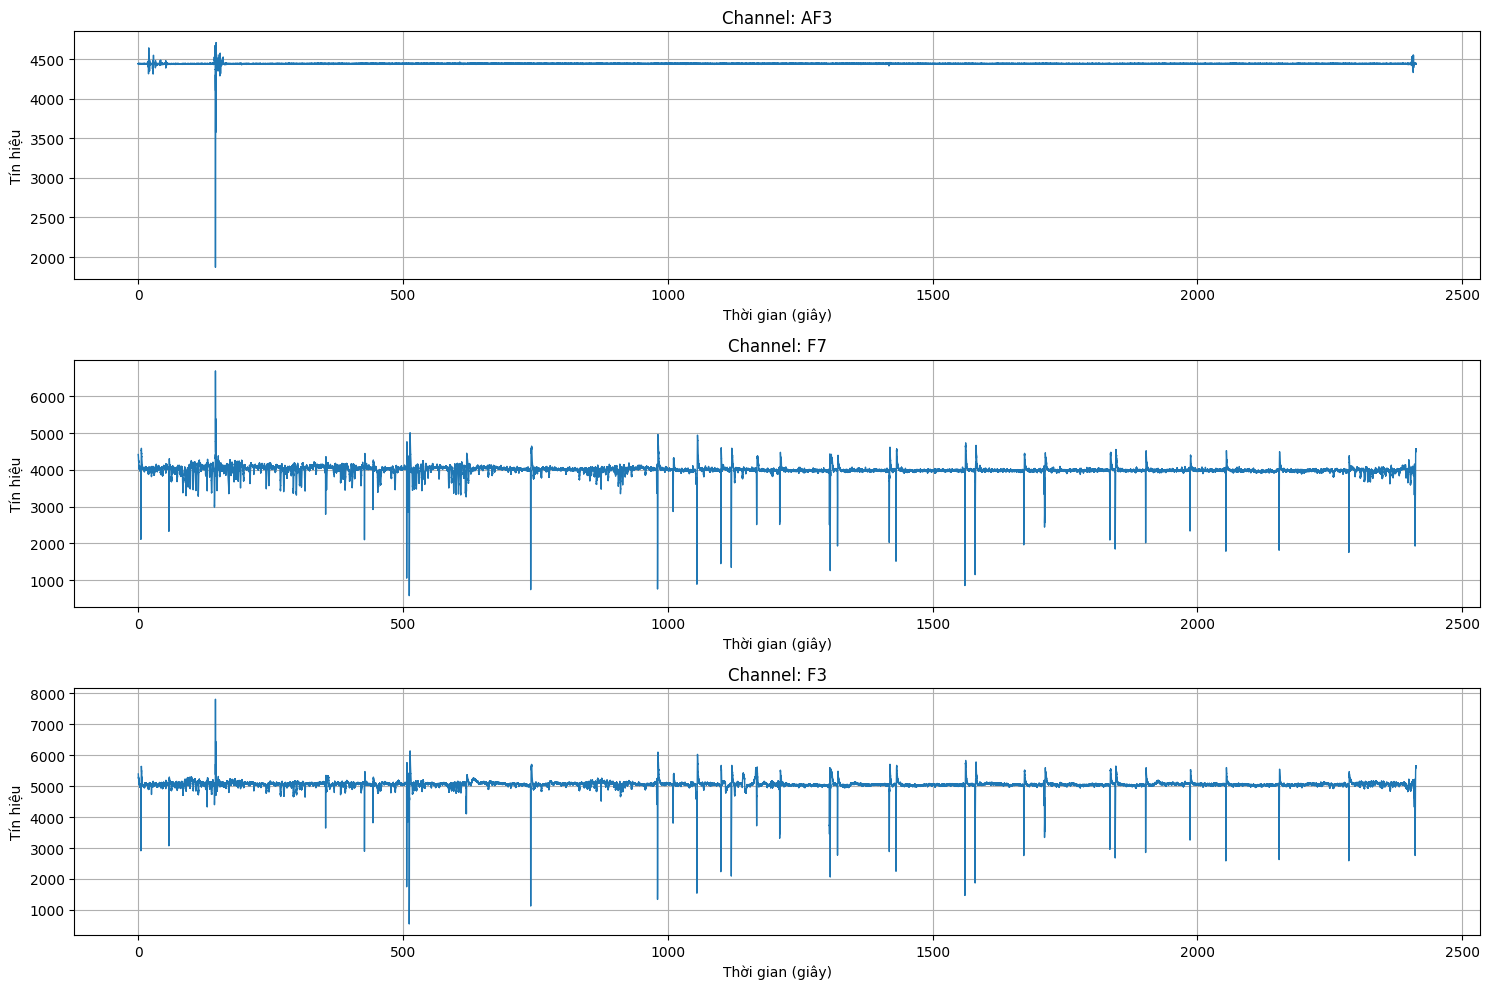

In [5]:
import matplotlib.pyplot as plt

def plot_eeg_channels(eeg_data: pd.DataFrame, channels: list = None):
    # Lấy danh sách các kênh nếu không được cung cấp
    if channels is None:
        channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1',
                    'O2', 'P8', 'T8', 'FC6', 'F4','F8' ,'AF4']
    
    # Kiểm tra các kênh có trong dữ liệu
    missing_channels = [ch for ch in channels if ch not in eeg_data.columns]
    if missing_channels:
        raise ValueError(f"Các kênh sau không có trong dữ liệu: {missing_channels}")

    # Thiết lập đồ thị
    plt.figure(figsize=(15, 10)) 
    for i, channel in enumerate(channels, 1):
        plt.subplot(len(channels), 1, i)
        plt.plot(eeg_data['timestamp_seconds'], eeg_data[channel], label=channel, linewidth=1)
        plt.title(f"Channel: {channel}")
        plt.xlabel("Thời gian (giây)")
        plt.ylabel("Tín hiệu")
        plt.grid(True)
        plt.tight_layout()

    plt.show()
plot_eeg_channels(eeg_data,channels=['AF3', 'F7', 'F3'])

In [6]:
eeg_data.info()
eeg_df = eeg_data.drop(['timestamp_seconds', 'state'], axis=1).set_index('timestamp')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308868 entries, 0 to 308867
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          308868 non-null  int64  
 1   AF3                308868 non-null  float64
 2   F7                 308868 non-null  float64
 3   F3                 308868 non-null  float64
 4   FC5                308868 non-null  float64
 5   T7                 308868 non-null  float64
 6   P7                 308868 non-null  float64
 7   O1                 308868 non-null  float64
 8   O2                 308868 non-null  float64
 9   P8                 308868 non-null  float64
 10  T8                 308868 non-null  float64
 11  FC6                308868 non-null  float64
 12  F4                 308868 non-null  float64
 13  F8                 308868 non-null  float64
 14  AF4                308868 non-null  float64
 15  timestamp_seconds  308868 non-null  float64
 16  st

Signal in each channels is in a unit of EEG signal -> to turn to Hz, use Fourier Transform then using bandpass filtered for ...

In [7]:
import mne
import pandas as pd

Eeg_data = eeg_df.values  
sfreq = 128

# Tạo thông tin kênh EEG cho MNE
info = mne.create_info(ch_names=eeg_df.columns.tolist(), sfreq=sfreq, ch_types='eeg')

# Chuyển dữ liệu thành Raw object của MNE
raw = mne.io.RawArray(Eeg_data.T, info)  # Dữ liệu cần chuyển thành shape (n_channels, n_times)

# Kiểm tra thông tin dữ liệu
print(raw.info)


Creating RawArray with float64 data, n_channels=14, n_times=308868
    Range : 0 ... 308867 =      0.000 ...  2413.023 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>


In [8]:
# Lọc tín hiệu EEG từ 1 Hz đến 40 Hz 
raw.filter(l_freq=0.2, h_freq=43)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 43 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 43.00 Hz
- Upper transition bandwidth: 10.75 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Filter length: 2113 samples (16.508 s)



<RawArray | 14 x 308868 (2413.0 s), ~33.0 MB, data loaded>

In [9]:
from mne.preprocessing import ICA

# Áp dụng ICA
ica = ICA(n_components=14, random_state=97, max_iter=800)
ica.fit(raw)
eog_indices, scores = ica.find_bads_eog(raw, ch_name="AF3")  # Chỉ định 1 kênh gần mắt
ica.exclude = eog_indices
# Áp dụng ICA để loại bỏ nhiễu
raw_clean = ica.apply(raw)

# Lưu dữ liệu đã được xử lý
raw_clean.save('eeg_data_cleaned.fif')


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 15.6s.
Using EOG channel: AF3
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-1

/tmp/ipykernel_30/259658872.py:12: RuntimeWarning: This filename (/kaggle/working/eeg_data_cleaned.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_clean.save('eeg_data_cleaned.fif')


Closing /kaggle/working/eeg_data_cleaned.fif
[done]


In [10]:
eeg_clean_data = raw_clean.get_data()  # Lấy dữ liệu đã xử lý từ Raw object

# Chuyển thành DataFrame và giữ nguyên timestamp là chỉ mục
eeg_clean_df = pd.DataFrame(eeg_clean_data.T, columns=eeg_df.columns.tolist(), index=eeg_df.index)



In [11]:
eeg_clean_df['timestamp_seconds']=eeg_data['timestamp_seconds']
eeg_clean_df['state']=eeg_data['state']

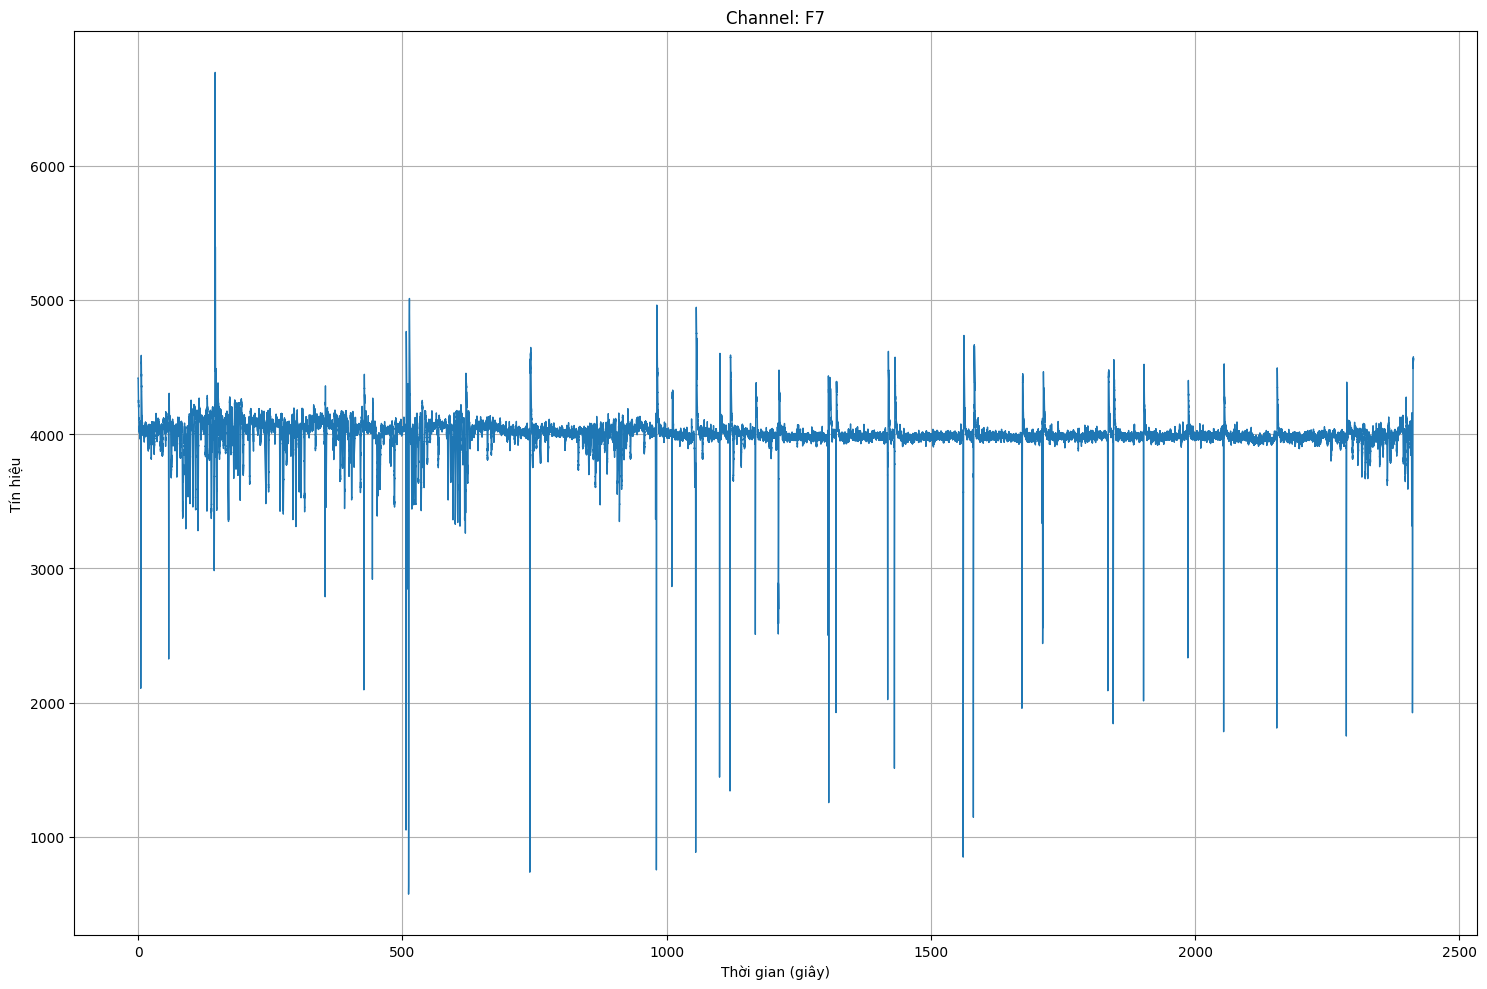

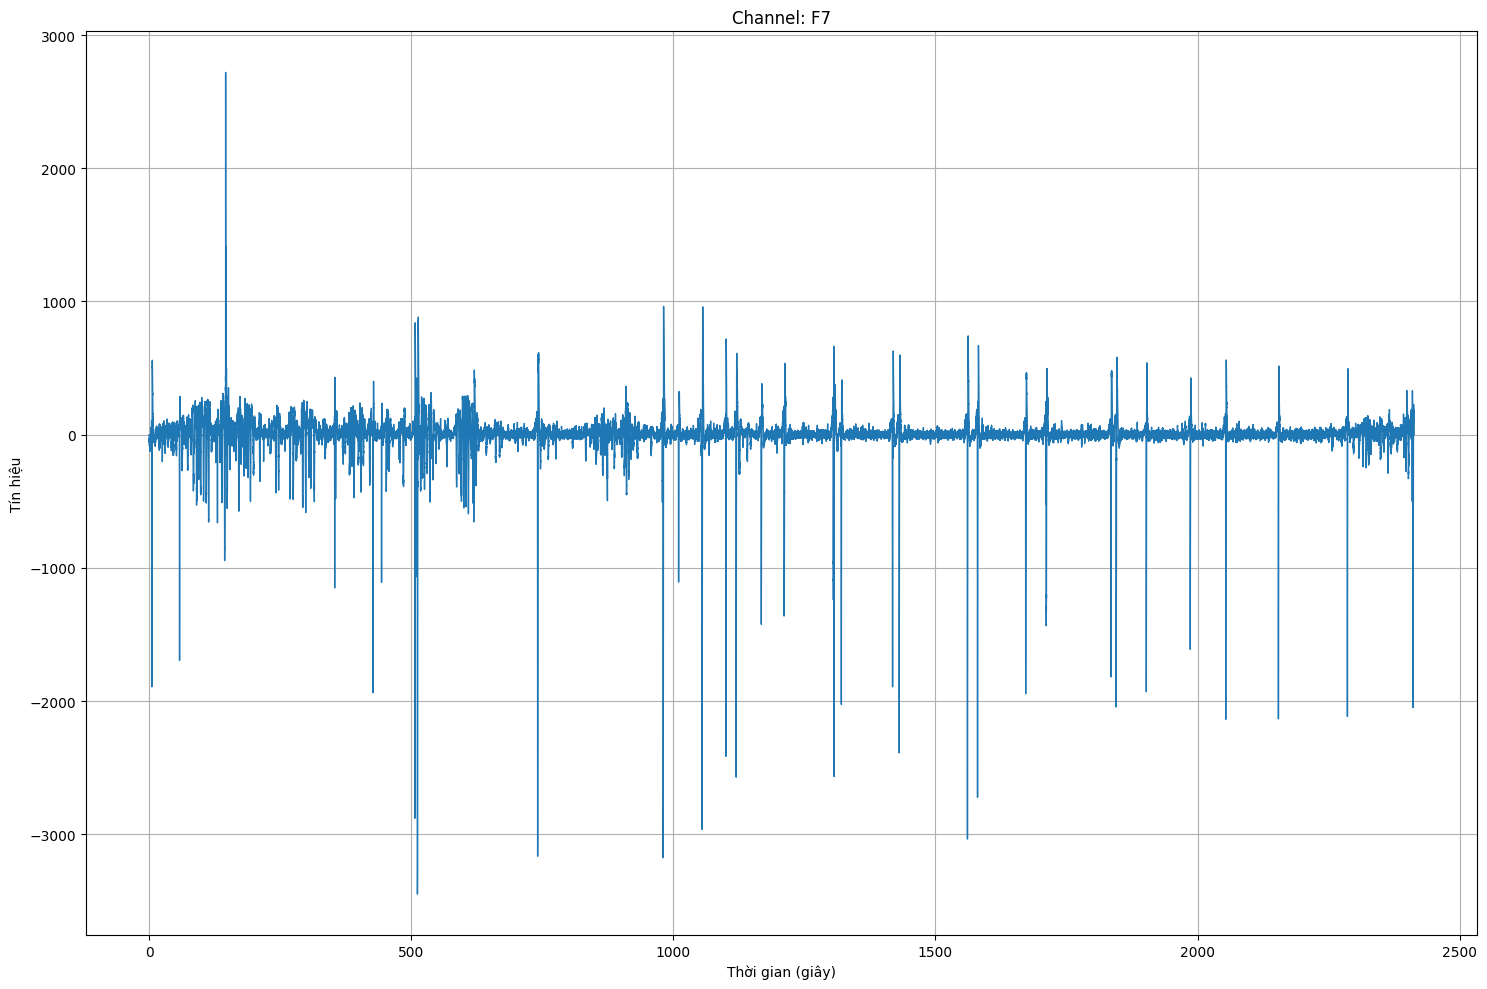

In [12]:
#before
plot_eeg_channels(eeg_data,channels=['F7'])
#after 
plot_eeg_channels(eeg_clean_df,channels=['F7'])

In [18]:
eeg_0 = eeg_clean_df[eeg_clean_df['state'] == 0]
print(eeg_0.shape[0])
eeg_1 = eeg_clean_df[eeg_clean_df['state'] == 1]
print(eeg_1.shape[0])
eeg_2 = eeg_clean_df[eeg_clean_df['state'] == 2] 
print(eeg_2.shape[0])
eeg_clean_df['state'].unique()


76801
76800
155267


array([0, 1, 2])

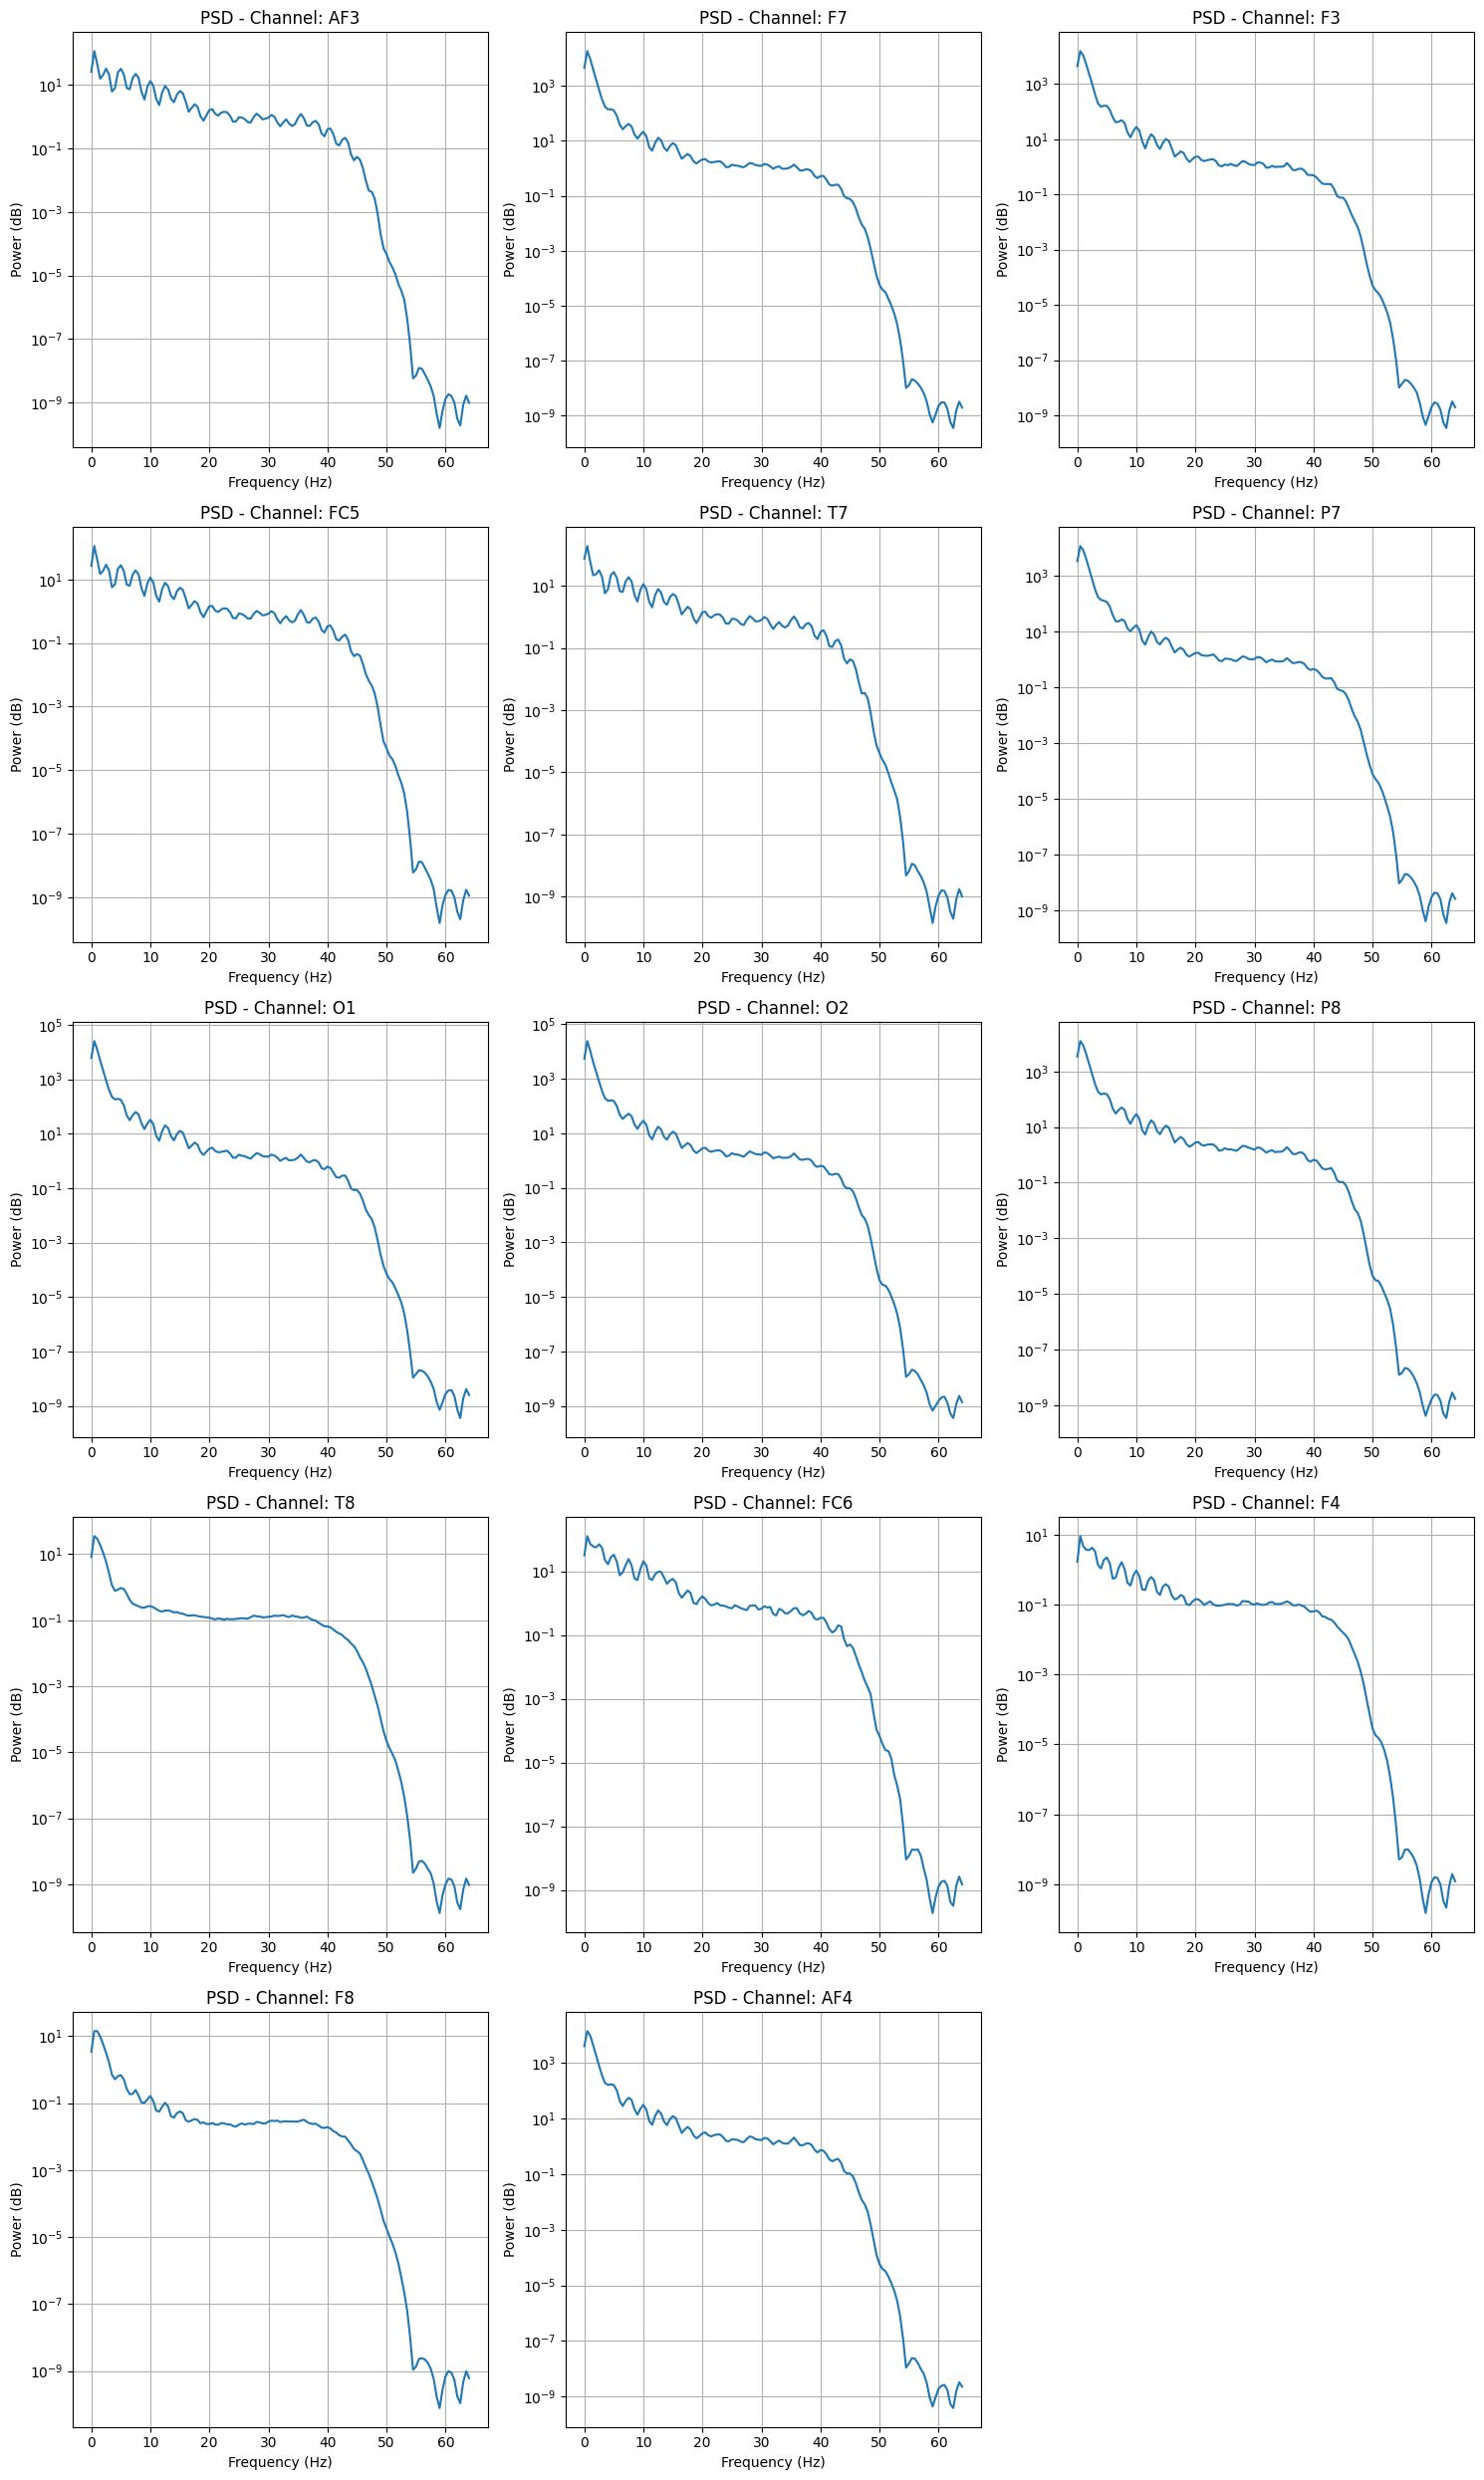

,delta,theta,alpha,beta,gamma,channel,state
0,151.787648,159.010591,86.914294,67.158473,14.536502,AF3,0
1,16458.984045,665.713935,157.871021,93.125671,20.749036,F7,0
2,20194.872097,827.438777,186.512129,102.234610,20.265706,F3,0
3,136.644697,136.453202,74.107448,57.129226,12.536165,FC5,0
4,170.913356,136.244697,73.260410,57.012839,12.376154,T7,0
5,15893.381460,605.857348,123.765145,73.361065,17.915542,P7,0
6,21065.606079,898.921291,231.202417,128.430227,23.533389,O1,0
7,18161.464442,795.230937,207.252161,125.383723,26.848175,O2,0
8,16174.700352,772.370314,199.116181,122.455298,26.680458,P8,0
9,69.989629,5.377451,2.514445,4.574715,2.430255,T8,0


In [20]:
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd

bands = {
    'delta': (1, 4),   # Dải delta (1-4 Hz)
    'theta': (4, 8),   # Dải theta (4-8 Hz)
    'alpha': (8, 13),  # Dải alpha (8-13 Hz)
    'beta': (13, 30),  # Dải beta (13-30 Hz)
    'gamma': (30, 40)  # Dải gamma (30-40 Hz)
}

fs = 128  # Tần số mẫu (Hz)

# Hàm tính năng lượng trong dải tần
def compute_band_power(frequencies, psd, freq_range):
    freq_idx = (frequencies >= freq_range[0]) & (frequencies <= freq_range[1])
    return sum(psd[freq_idx])

# Hàm xử lý dữ liệu EEG và vẽ đồ thị PSD
def data_in_type(eeg_i):
    eeg = eeg_i.drop(['timestamp_seconds', 'state'], axis=1)  
    result = []
    
    # Số lượng kênh
    num_channels = len(eeg.columns)
    
    # Tạo số lượng hàng và cột cho đồ thị (3 đồ thị mỗi hàng)
    nrows = (num_channels // 3) + (1 if num_channels % 3 != 0 else 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))
    axes = axes.flatten()  # Chuyển đổi mảng 2D thành 1D để dễ dàng truy cập
    
    for i, channel in enumerate(eeg.columns):
        signal = eeg[channel].values
        
        # Tính PSD bằng phương pháp Welch
        frequencies, psd = welch(signal, fs, nperseg=fs*2)
        
        # Tính năng lượng trong từng dải tần
        band_powers = {band: compute_band_power(frequencies, psd, freq_range) for band, freq_range in bands.items()}
        band_powers['channel'] = channel  # Thêm tên kênh
        
        # Thêm thông tin state từ eeg
        band_powers['state'] = eeg_i.loc[i, 'state']
        result.append(band_powers)
        
        # Vẽ đồ thị PSD cho từng kênh (đặt vào các vị trí tương ứng)
        ax = axes[i]
        ax.semilogy(frequencies, psd)
        ax.set_title(f'PSD - Channel: {channel}')
        ax.set_xlabel('Frequency (Hz)')
        ax.set_ylabel('Power (dB)')
        ax.grid(True)
    
    # Xóa các axes dư thừa nếu số kênh không chia hết cho 3
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Tối ưu hóa việc hiển thị và vẽ đồ thị
    plt.tight_layout()
    plt.show()

    return pd.DataFrame(result)

data_in_type(eeg_0)